# SOCAT analysis

:cat: :cat: :cat: :cat: :cat: :cat: 

     1. Explore the SOCATv2021_tracks_gridded_monthly.nc and recover major (time) trends in the SO
    2. Compare how T001 and M001 do against these obs. 


In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
runhorse = False

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [4]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater

#import mapfxn as mf
#reload(mf)

import sys
sys.path.append('/gpfs/home/mep22dku/scratch/mocsy-master')
import mocsy


plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [5]:
import gsw

In [6]:
### landmask
#1 land, 2 atl, 3 ind, 4 pac
lm = nc.Dataset('../UTILS/sector_landmask_regrid.nc')
sector_S0 = lm['sectormask'][0:40,:]

In [7]:
if runhorse:
    
    obsdir = '/gpfs/data/greenocean/software/resources/Observations/'
    tdir = '/gpfs/home/mep22dku/scratch/'
    tso = 'SOCATv2021_tracks_gridded_monthly.nc'
    so = nc.Dataset(f'{tdir}{tso}')
    print(so)
    fco2_so_ave_weighted = (so['fco2_ave_weighted'][:,0:40,:])
    fco2_so_ave_unwtd = (so['fco2_ave_unwtd'][:,0:40,:])
    fco2_so_min_unwtd = (so['fco2_min_unwtd'][:,0:40,:])
    fco2_so_max_unwtd = (so['fco2_max_unwtd'][:,0:40,:])

    fco2_so_ave_weighted_f =np.ma.filled(fco2_so_ave_weighted, fill_value=np.nan)
    fco2_so_ave_unwtd_f =np.ma.filled(fco2_so_ave_unwtd, fill_value=np.nan)
    fco2_so_min_unwtd_f =np.ma.filled(fco2_so_min_unwtd, fill_value=np.nan)
    fco2_so_max_unwtd_f =np.ma.filled(fco2_so_max_unwtd, fill_value=np.nan)
    
    pickle.dump(fco2_so_ave_weighted_f, open("./pkls/fco2_so_ave_weighted_f.pkl", 'wb'))
    pickle.dump(fco2_so_ave_unwtd_f, open("./pkls/fco2_so_ave_unwtd_f.pkl", 'wb'))
    pickle.dump(fco2_so_min_unwtd_f, open("./pkls/fco2_so_min_unwtd_f.pkl", 'wb'))
    pickle.dump(fco2_so_max_unwtd_f, open("./pkls/fco2_so_max_unwtd_f.pkl", 'wb'))


In [8]:
fco2_so_ave_weighted_f = pickle.load(open('./pkls/fco2_so_ave_weighted_f.pkl', 'rb'))
fco2_so_ave_unwtd_f = pickle.load(open('./pkls/fco2_so_ave_unwtd_f.pkl', 'rb'))
fco2_so_min_unwtd_f = pickle.load(open('./pkls/fco2_so_min_unwtd_f.pkl', 'rb'))
fco2_so_max_unwtd_f = pickle.load(open('./pkls/fco2_so_max_unwtd_f.pkl', 'rb'))
      

In [9]:
#EXTREMELY HACKY DATES
mons = np.zeros([51,12]); yrs = np.zeros([51,12])

for i in range(0,51): yrs[i,:] = 1970+i
for i in range(0,12): mons[:,i] = i+1
mons_r = mons.ravel()
yrs_r = yrs.ravel()
yrs_dec = np.zeros(612)
for i in range(0,612): yrs_dec[i] = yrs_r[i] + (mons_r[i]-1)/12


In [10]:
fco2_ts = np.zeros([4,612])

for i in range(0,612):
    fco2_ts[0,i] = (np.nanmean(fco2_so_ave_weighted_f[i,:,:]))
    fco2_ts[1,i] = (np.nanmean(fco2_so_ave_unwtd_f[i,:,:]))
    fco2_ts[2,i] = (np.nanmin(fco2_so_min_unwtd_f[i,:,:]))
    fco2_ts[3,i] = (np.nanmax(fco2_so_max_unwtd_f[i,:,:]))

fco2_ts_summer = np.zeros([4,51])
fco2_ts_winter = np.zeros([4,51])
fco2_ts_spring = np.zeros([4,51])
fco2_ts_fall = np.zeros([4,51])
fco2_ts_fy = np.zeros([4,51])


for i in range(0,51):
    #summer
    tar = np.where((yrs_r == (1970+i)) & ((mons_r <3) | (mons_r == 12)))
    fco2_ts_summer[0,i] = (np.nanmean(fco2_so_ave_weighted_f[tar,:,:]))
    fco2_ts_summer[1,i] = (np.nanmean(fco2_so_ave_unwtd_f[tar,:,:]))
    fco2_ts_summer[2,i] = (np.nanmin(fco2_so_min_unwtd_f[tar,:,:]))
    fco2_ts_summer[3,i] = (np.nanmax(fco2_so_max_unwtd_f[tar,:,:]))
    
    tar = np.where((yrs_r == (1970+i)) & ((mons_r >5 ) & (mons_r < 9)))
    fco2_ts_winter[0,i] = (np.nanmean(fco2_so_ave_weighted_f[tar,:,:]))
    fco2_ts_winter[1,i] = (np.nanmean(fco2_so_ave_unwtd_f[tar,:,:]))
    fco2_ts_winter[2,i] = (np.nanmin(fco2_so_min_unwtd_f[tar,:,:]))
    fco2_ts_winter[3,i] = (np.nanmax(fco2_so_max_unwtd_f[tar,:,:]))

    #spring
    tar = np.where((yrs_r == (1970+i)) & ((mons_r >8) & (mons_r < 12)))
    fco2_ts_spring[0,i] = (np.nanmean(fco2_so_ave_weighted_f[tar,:,:]))
    fco2_ts_spring[1,i] = (np.nanmean(fco2_so_ave_unwtd_f[tar,:,:]))
    fco2_ts_spring[2,i] = (np.nanmin(fco2_so_min_unwtd_f[tar,:,:]))
    fco2_ts_spring[3,i] = (np.nanmax(fco2_so_max_unwtd_f[tar,:,:]))
    
    tar = np.where((yrs_r == (1970+i)) & ((mons_r >2 ) & (mons_r < 6)))
    fco2_ts_fall[0,i] = (np.nanmean(fco2_so_ave_weighted_f[tar,:,:]))
    fco2_ts_fall[1,i] = (np.nanmean(fco2_so_ave_unwtd_f[tar,:,:]))
    fco2_ts_fall[2,i] = (np.nanmin(fco2_so_min_unwtd_f[tar,:,:]))
    fco2_ts_fall[3,i] = (np.nanmax(fco2_so_max_unwtd_f[tar,:,:]))
    
    tar = np.where((yrs_r == (1970+i)))
    fco2_ts_fy[0,i] = (np.nanmean(fco2_so_ave_weighted_f[tar,:,:]))
    fco2_ts_fy[1,i] = (np.nanmean(fco2_so_ave_unwtd_f[tar,:,:]))
    fco2_ts_fy[2,i] = (np.nanmin(fco2_so_min_unwtd_f[tar,:,:]))
    fco2_ts_fy[3,i] = (np.nanmax(fco2_so_max_unwtd_f[tar,:,:]))

In [11]:
fco2_ts_monthly = np.zeros([12,4,51])

for i in range(0,51):
    for m in range(1,13):
        tar = np.where((yrs_r == (1970+i)) & ((mons_r == m)))
        fco2_ts_monthly[m-1,0,i] = (np.nanmean(fco2_so_ave_weighted_f[tar,:,:]))
        fco2_ts_monthly[m-1,1,i] = (np.nanmean(fco2_so_ave_unwtd_f[tar,:,:]))
        fco2_ts_monthly[m-1,2,i] = (np.nanmin(fco2_so_min_unwtd_f[tar,:,:]))
        fco2_ts_monthly[m-1,3,i] = (np.nanmax(fco2_so_max_unwtd_f[tar,:,:]))

    tar = np.where((yrs_r == (1970+i)))
    fco2_ts_fy[0,i] = (np.nanmean(fco2_so_ave_weighted_f[tar,:,:]))
    fco2_ts_fy[1,i] = (np.nanmean(fco2_so_ave_unwtd_f[tar,:,:]))
    fco2_ts_fy[2,i] = (np.nanmin(fco2_so_min_unwtd_f[tar,:,:]))
    fco2_ts_fy[3,i] = (np.nanmax(fco2_so_max_unwtd_f[tar,:,:]))

## Notes:

For a given year, mean fco2 from weighted cruises and mean fco2 from unweighted cruises are not in general very different (max diff 3uatm?). here I just use the weighted mean. seems better. 

Text(0, 0.5, 'fCO2 (uatm)')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


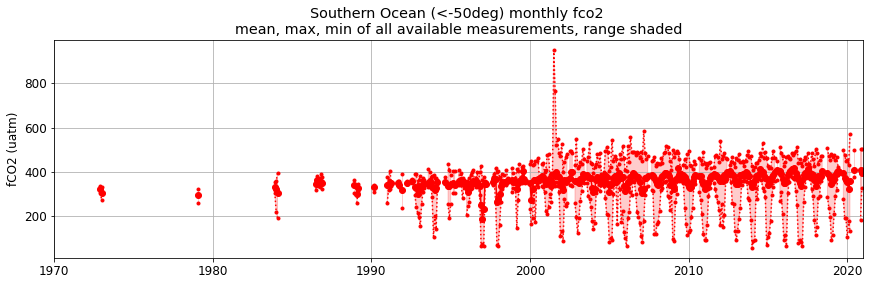

In [12]:
yrs_int = np.arange(1970,2021,1)
fact = 0.5
fig, axs = plt.subplots(1,1, figsize=(29*fact, 8*fact), \
                        facecolor='w', edgecolor='k')

axs.plot(yrs_dec,fco2_ts[2,:],'r.:')
axs.plot(yrs_dec,fco2_ts[0,:],'ro-')
axs.plot(yrs_dec,fco2_ts[3,:],'r.:')
axs.fill_between(yrs_dec,fco2_ts[2,:],fco2_ts[3,:],color = 'r', alpha = 0.2)

axs.grid()
axs.set_xlim([1970,2021])
tit1 = 'Southern Ocean (<-50deg) monthly fco2 \n'
tit2 = 'mean, max, min of all available measurements, range shaded'
tit = f'{tit1}{tit2}'


axs.set_title(tit)
axs.set_ylabel('fCO2 (uatm)')

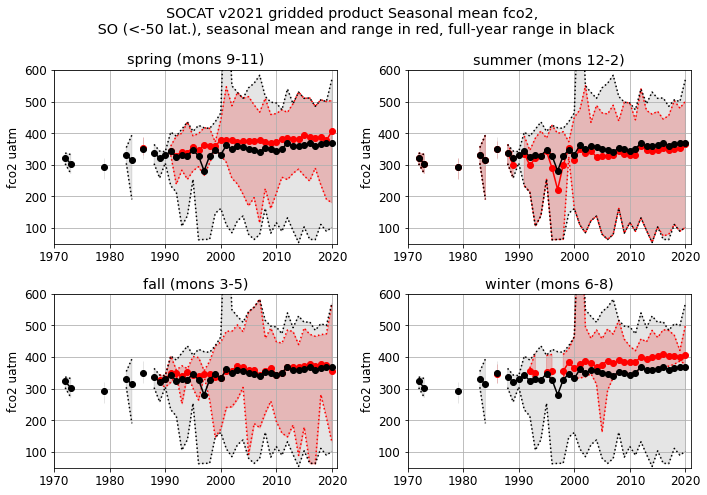

In [13]:
yrs_int = np.arange(1970,2021,1)
fact = 0.5
fig, axs = plt.subplots(2,2, figsize=(20*fact, 14*fact), \
                        facecolor='w', edgecolor='k')
axs = axs.ravel() 

axs[0].plot(yrs_int,fco2_ts_spring[2,:],'r:')
axs[0].plot(yrs_int,fco2_ts_spring[0,:],'ro-')
axs[0].plot(yrs_int,fco2_ts_spring[3,:],'r:')
axs[0].fill_between(yrs_int,fco2_ts_spring[2,:],\
                    fco2_ts_spring[3,:],color = 'r', alpha = 0.2)

axs[1].plot(yrs_int,fco2_ts_summer[2,:],'r:')
axs[1].plot(yrs_int,fco2_ts_summer[0,:],'ro-')
axs[1].plot(yrs_int,fco2_ts_summer[3,:],'r:')
axs[1].fill_between(yrs_int,fco2_ts_summer[2,:],\
                    fco2_ts_summer[3,:],color = 'r', alpha = 0.2)

axs[2].plot(yrs_int,fco2_ts_fall[2,:],'r:')
axs[2].plot(yrs_int,fco2_ts_fall[0,:],'ro-')
axs[2].plot(yrs_int,fco2_ts_fall[3,:],'r:')
axs[2].fill_between(yrs_int,fco2_ts_fall[2,:],\
                    fco2_ts_fall[3,:],color = 'r', alpha = 0.2)

axs[3].plot(yrs_int,fco2_ts_winter[2,:],'r:')
axs[3].plot(yrs_int,fco2_ts_winter[0,:],'ro-')
axs[3].plot(yrs_int,fco2_ts_winter[3,:],'r:')
axs[3].fill_between(yrs_int,fco2_ts_winter[2,:],\
                    fco2_ts_winter[3,:],color = 'r', alpha = 0.2)

tits = ['spring (mons 9-11)','summer (mons 12-2)',\
        'fall (mons 3-5)','winter (mons 6-8)']
for i in range(0,4):
    axs[i].plot(yrs_int,fco2_ts_fy[2,:],'k:')
    axs[i].plot(yrs_int,fco2_ts_fy[0,:],'ko-')
    axs[i].plot(yrs_int,fco2_ts_fy[3,:],'k:')
    axs[i].fill_between(yrs_int,fco2_ts_fy[2,:],\
                        fco2_ts_fy[3,:],color = 'k', alpha = 0.1)
    axs[i].set_ylim([50,600])
    axs[i].set_xlim([1970,2021])
    axs[i].set_title(tits[i])
    axs[i].grid()
    axs[i].set_ylabel('fco2 uatm')

plt.suptitle('SOCAT v2021 gridded product Seasonal mean fco2, \n SO (<-50 lat.), seasonal mean and range in red, full-year range in black')
plt.tight_layout()
             #axs.plot(yrs_dec,,'ro:')

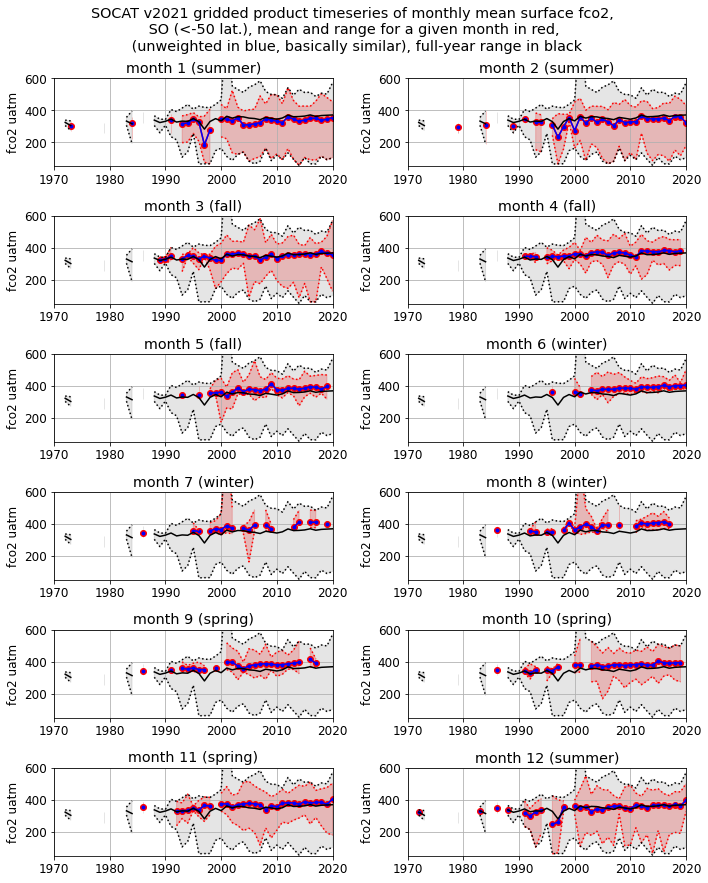

In [14]:
yrs_int = np.arange(1970,2021,1)
fact = 0.5
fig, axs = plt.subplots(6,2, figsize=(20*fact, 25*fact), \
                        facecolor='w', edgecolor='k')
axs = axs.ravel() 

for m in range(0,12):
    axs[m].plot(yrs_int,fco2_ts_monthly[m,2,:],'r:')
    axs[m].plot(yrs_int,fco2_ts_monthly[m,0,:],'ro-')
    axs[m].plot(yrs_int,fco2_ts_monthly[m,1,:],'b.-')
    axs[m].plot(yrs_int,fco2_ts_monthly[m,3,:],'r:')
    axs[m].fill_between(yrs_int,fco2_ts_monthly[m,2,:],\
                        fco2_ts_monthly[m,3,:],color = 'r', alpha = 0.2)

tt = ['summer','summer','fall','fall','fall','winter','winter','winter',\
      'spring','spring','spring','summer']
for i in range(0,12):
    axs[i].plot(yrs_int,fco2_ts_fy[2,:],'k:')
    axs[i].plot(yrs_int,fco2_ts_fy[0,:],'k-')
    axs[i].plot(yrs_int,fco2_ts_fy[3,:],'k:')
    axs[i].fill_between(yrs_int,fco2_ts_fy[2,:],\
                        fco2_ts_fy[3,:],color = 'k', alpha = 0.1)
    axs[i].set_ylim([50,600])
    axs[i].set_xlim([1970,2020])
    axs[i].set_title(f'month {i+1} ({tt[i]})')
    axs[i].grid()
    axs[i].set_ylabel('fco2 uatm')

plt.suptitle('SOCAT v2021 gridded product timeseries of monthly mean surface fco2, \n SO (<-50 lat.), mean and range for a given month in red, \n (unweighted in blue, basically similar), full-year range in black')
plt.tight_layout()
             #axs.plot(yrs_dec,,'ro:')

FCO2 from TOM

     - calculate fCO2 from the model from model pCO2, votemper, T, S 
         - also subsample the model fields to only where observations exist, do similar averaging as above. 
    - get monthly fco2 averages 
    - compare monthly fco2 averages for whole domain vs where data exists

In [15]:

if runhorse:
    M001_fco2_so_ave_unwtd = np.zeros([612, 40, 360])
    count = 0
    for i in range(0,51):
        if i%5 == 0: print(i)
        yr = 1970+i
        M001 = '/gpfs/data/greenocean/software/runs/TOM12_TJ_M001/'
        T = nc.Dataset(f'{M001}WOA_votemper_{yr}_all.nc')
        S = nc.Dataset(f'{M001}WOA_vosaline_{yr}_all.nc')
        pCO2 = nc.Dataset(f'{M001}WOA_pCO2_{yr}_all.nc')

        T_surf = (T['votemper'][:,0,0:40,:])
        S_surf = (S['vosaline'][:,0,0:40,:])
        t_pCO2 = pCO2['pCO2'][:,0:40,:]

        #ravel it
        tpco2ra = np.ravel(t_pCO2)
        tsra = np.ravel(S_surf)
        ttera = np.ravel(T_surf)
        tzero = np.zeros_like(ttera)
        tones = np.copy(tzero)
        ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

        tfco2ra = mocsy.mp2fco2(tpco2ra,ttera_is,tones,tzero)
        t_fCO2 = tfco2ra.reshape(12,40,360)    
        M001_fco2_so_ave_unwtd[count:count+12,:,:] = t_fCO2
        count = count+12

    T001_fco2_so_ave_unwtd = np.zeros([612, 40, 360])
    count = 0
    for i in range(0,51):
        if i%5 == 0: print(i)
        yr = 1970+i
        T001 = '/gpfs/data/greenocean/software/runs/TOM12_TJ_T001/'
        T = nc.Dataset(f'{T001}WOA_votemper_{yr}_all.nc')
        S = nc.Dataset(f'{T001}WOA_vosaline_{yr}_all.nc')
        pCO2 = nc.Dataset(f'{T001}WOA_pCO2_{yr}_all.nc')

        T_surf = (T['votemper'][:,0,0:40,:])
        S_surf = (S['vosaline'][:,0,0:40,:])
        t_pCO2 = pCO2['pCO2'][:,0:40,:]

        #ravel it
        tpco2ra = np.ravel(t_pCO2)
        tsra = np.ravel(S_surf)
        ttera = np.ravel(T_surf)
        tzero = np.zeros_like(ttera)
        tones = np.copy(tzero)
        ttera_is = gsw.t_from_CT(tsra,ttera,tzero)

        tfco2ra = mocsy.mp2fco2(tpco2ra,ttera_is,tones,tzero)
        t_fCO2 = tfco2ra.reshape(12,40,360)    
        T001_fco2_so_ave_unwtd[count:count+12,:,:] = t_fCO2
        count = count+12    
    print('done')

    pickle.dump(T001_fco2_so_ave_unwtd, open("./pkls/T001_fco2_so_ave_unwtd.pkl", 'wb'))
    pickle.dump(M001_fco2_so_ave_unwtd, open("./pkls/M001_fco2_so_ave_unwtd.pkl", 'wb'))
  

In [47]:
mocsy.mp2fco2.__doc__

"fco2 = p2fco2(pco2,temp,patm,p)\n\nWrapper for ``p2fco2``.\n\nParameters\n----------\npco2 : input rank-1 array('d') with bounds (n)\ntemp : input rank-1 array('d') with bounds (n)\npatm : input rank-1 array('d') with bounds (n)\np : input rank-1 array('d') with bounds (n)\n\nReturns\n-------\nfco2 : rank-1 array('d') with bounds (n)\n"

In [43]:
runhorse2 = True
if runhorse2:
    #M001_fco2_so_ave_unwtd = np.zeros([612, 40, 360])
    count = 0
    for i in range(0,1):
        if i%5 == 0: print(i)
        print('wheeee')
        yr = 1970+i
        M001 = '/gpfs/data/greenocean/software/runs/TOM12_TJ_M001/'
        T = nc.Dataset(f'{M001}WOA_votemper_{yr}_all.nc')
        S = nc.Dataset(f'{M001}WOA_vosaline_{yr}_all.nc')
        pCO2 = nc.Dataset(f'{M001}WOA_pCO2_{yr}_all.nc')

        T_surf = (T['votemper'][:,0,0:40,:])
        S_surf = (S['vosaline'][:,0,0:40,:])
        t_pCO2 = pCO2['pCO2'][:,0:40,:]
        print(type(T_surf))
        #ravel it
        tpco2ra = np.ravel(t_pCO2)
        tsra = np.ravel(S_surf)
        ttera = np.ravel(T_surf)
        print(np.max(ttera))
        print(np.min(ttera))
        print(np.max(tsra))
        print(np.min(tsra))
        print(np.shape(np.where(ttera ==0)))
        tzero = np.zeros_like(ttera)
        tones = np.copy(tzero)
        tones[:] = 7000.1
        ttera_is = gsw.t_from_CT(tsra,ttera,tones)
        diff = ttera - ttera_is
        print(np.nanmean(diff))

  

0
wheeee
<class 'numpy.ma.core.MaskedArray'>
12.464206
-2.4498005
34.49097
31.606987
(1, 0)
-0.7117596029733996


In [16]:
T001_fco2_so_ave_unwtd = pickle.load(open('./pkls/T001_fco2_so_ave_unwtd.pkl', 'rb'))
M001_fco2_so_ave_unwtd = pickle.load(open('./pkls/M001_fco2_so_ave_unwtd.pkl', 'rb'))

#shiptracks only
T001_fco2_so_ave_unwtd_st = np.copy(T001_fco2_so_ave_unwtd)
T001_fco2_so_ave_unwtd_st[np.isnan(fco2_so_ave_weighted_f)] = np.nan
M001_fco2_so_ave_unwtd_st = np.copy(M001_fco2_so_ave_unwtd)
M001_fco2_so_ave_unwtd_st[np.isnan(fco2_so_ave_weighted_f)] = np.nan

In [17]:
T001_monthly = np.zeros([12,4,51])
T001_monthly_st= np.zeros([12,4,51])
T001_fy = np.zeros([4,51])
T001_fy= np.zeros([4,51])

for i in range(0,51):
    for m in range(1,13):
        tar = np.where((yrs_r == (1970+i)) & ((mons_r == m)))
        T001_monthly[m-1,0,i] = (np.nanmean(T001_fco2_so_ave_unwtd[tar,:,:]))
        T001_monthly[m-1,1,i] = (np.nanmean(T001_fco2_so_ave_unwtd[tar,:,:]))
        T001_monthly[m-1,2,i] = (np.nanmin(T001_fco2_so_ave_unwtd[tar,:,:]))
        T001_monthly[m-1,3,i] = (np.nanmax(T001_fco2_so_ave_unwtd[tar,:,:]))
        T001_monthly_st[m-1,0,i] = (np.nanmean(T001_fco2_so_ave_unwtd_st[tar,:,:]))
        T001_monthly_st[m-1,1,i] = (np.nanmean(T001_fco2_so_ave_unwtd_st[tar,:,:]))
        T001_monthly_st[m-1,2,i] = (np.nanmin(T001_fco2_so_ave_unwtd_st[tar,:,:]))
        T001_monthly_st[m-1,3,i] = (np.nanmax(T001_fco2_so_ave_unwtd_st[tar,:,:]))

        
    tar = np.where((yrs_r == (1970+i)))
    T001_fy[0,i] = (np.nanmean(T001_fco2_so_ave_unwtd[tar,:,:]))
    T001_fy[1,i] = (np.nanmean(T001_fco2_so_ave_unwtd[tar,:,:]))
    T001_fy[2,i] = (np.nanmin(T001_fco2_so_ave_unwtd[tar,:,:]))
    T001_fy[3,i] = (np.nanmax(T001_fco2_so_ave_unwtd[tar,:,:]))
    
M001_monthly = np.zeros([12,4,51])
M001_monthly_st= np.zeros([12,4,51])
M001_fy = np.zeros([4,51])
M001_fy= np.zeros([4,51])

for i in range(0,51):
    for m in range(1,13):
        tar = np.where((yrs_r == (1970+i)) & ((mons_r == m)))
        M001_monthly[m-1,0,i] = (np.nanmean(M001_fco2_so_ave_unwtd[tar,:,:]))
        M001_monthly[m-1,1,i] = (np.nanmean(M001_fco2_so_ave_unwtd[tar,:,:]))
        M001_monthly[m-1,2,i] = (np.nanmin(M001_fco2_so_ave_unwtd[tar,:,:]))
        M001_monthly[m-1,3,i] = (np.nanmax(M001_fco2_so_ave_unwtd[tar,:,:]))
        M001_monthly_st[m-1,0,i] = (np.nanmean(M001_fco2_so_ave_unwtd_st[tar,:,:]))
        M001_monthly_st[m-1,1,i] = (np.nanmean(M001_fco2_so_ave_unwtd_st[tar,:,:]))
        M001_monthly_st[m-1,2,i] = (np.nanmin(M001_fco2_so_ave_unwtd_st[tar,:,:]))
        M001_monthly_st[m-1,3,i] = (np.nanmax(M001_fco2_so_ave_unwtd_st[tar,:,:]))

        
    tar = np.where((yrs_r == (1970+i)))
    M001_fy[0,i] = (np.nanmean(M001_fco2_so_ave_unwtd[tar,:,:]))
    M001_fy[1,i] = (np.nanmean(M001_fco2_so_ave_unwtd[tar,:,:]))
    M001_fy[2,i] = (np.nanmin(M001_fco2_so_ave_unwtd[tar,:,:]))
    M001_fy[3,i] = (np.nanmax(M001_fco2_so_ave_unwtd[tar,:,:]))

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


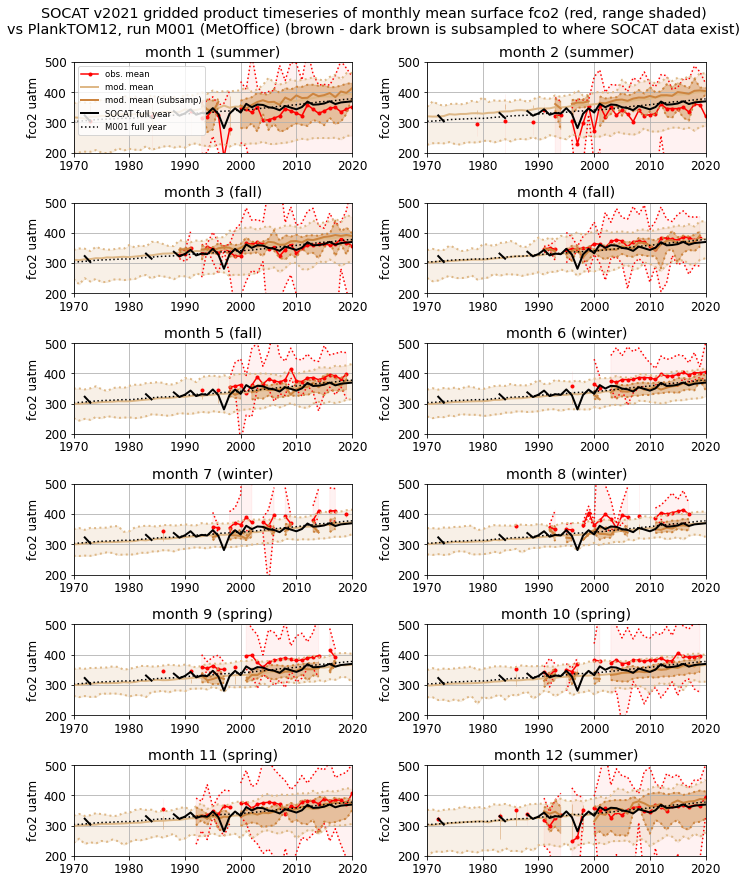

In [18]:
yrs_int = np.arange(1970,2021,1)
fact = 0.5
fig, axs = plt.subplots(6,2, figsize=(20*fact, 25*fact), \
                        facecolor='w', edgecolor='k')
axs = axs.ravel() 

m0colst = 'peru'; m0col = 'burlywood'
for m in range(0,12):
    axs[m].plot(yrs_int,fco2_ts_monthly[m,2,:],'r:')
    axs[m].plot(yrs_int,fco2_ts_monthly[m,0,:],'r.-', label = 'obs. mean')
    axs[m].plot(yrs_int,fco2_ts_monthly[m,3,:],'r:')
    axs[m].fill_between(yrs_int,fco2_ts_monthly[m,2,:],\
                        fco2_ts_monthly[m,3,:],color = 'r', alpha = 0.05)

    
    axs[m].plot(yrs_int,M001_monthly[m,2,:],color = m0col, linestyle = ':',linewidth = 2)
    axs[m].plot(yrs_int,M001_monthly[m,0,:],\
                color = m0col, linestyle = '-', linewidth = 2, label = 'mod. mean')
    axs[m].plot(yrs_int,M001_monthly[m,3,:],color = m0col, linestyle = ':',linewidth = 2)
    axs[m].fill_between(yrs_int,M001_monthly[m,2,:],\
                        M001_monthly[m,3,:],color = m0col, alpha = 0.2)
    axs[m].plot(yrs_int,M001_monthly_st[m,2,:],color = m0colst, linestyle = ':',linewidth = 2)
    axs[m].plot(yrs_int,M001_monthly_st[m,0,:],color = m0colst, linestyle = '-', linewidth = 2, label = 'mod. mean (subsamp)')
    axs[m].plot(yrs_int,M001_monthly_st[m,3,:],color = m0colst, linestyle = ':',linewidth = 2)
    axs[m].fill_between(yrs_int,M001_monthly_st[m,2,:],\
                        M001_monthly_st[m,3,:],color = m0colst, alpha = 0.4)
    
tt = ['summer','summer','fall','fall','fall','winter','winter','winter',\
      'spring','spring','spring','summer']
for i in range(0,12):
    axs[i].plot(yrs_int,fco2_ts_fy[0,:],'k-', linewidth = 2, label = 'SOCAT full year')
    axs[i].plot(yrs_int,M001_fy[0,:],color ='k', linestyle = ':', label = 'M001 full year')
    axs[i].set_ylim([200,500])
    axs[i].set_xlim([1970,2020])
    axs[i].set_title(f'month {i+1} ({tt[i]})')
    axs[i].grid()
    axs[i].set_ylabel('fco2 uatm')
    axs[0].legend(loc = 'best', fontsize = 8.5, ncol = 1)
tit1 = 'SOCAT v2021 gridded product timeseries of monthly mean surface fco2 (red, range shaded)'
tit2 = 'vs PlankTOM12, run M001 (MetOffice) (brown - dark brown is subsampled to where SOCAT data exist)'
#plt.suptitle(, \n SO (<-50 lat.), mean and range for a given month in red, \n (unweighted in blue, basically similar), full-year range in black')
plt.suptitle(f'{tit1}\n{tit2}')
plt.tight_layout()
             #axs.plot(yrs_dec,,'ro:')

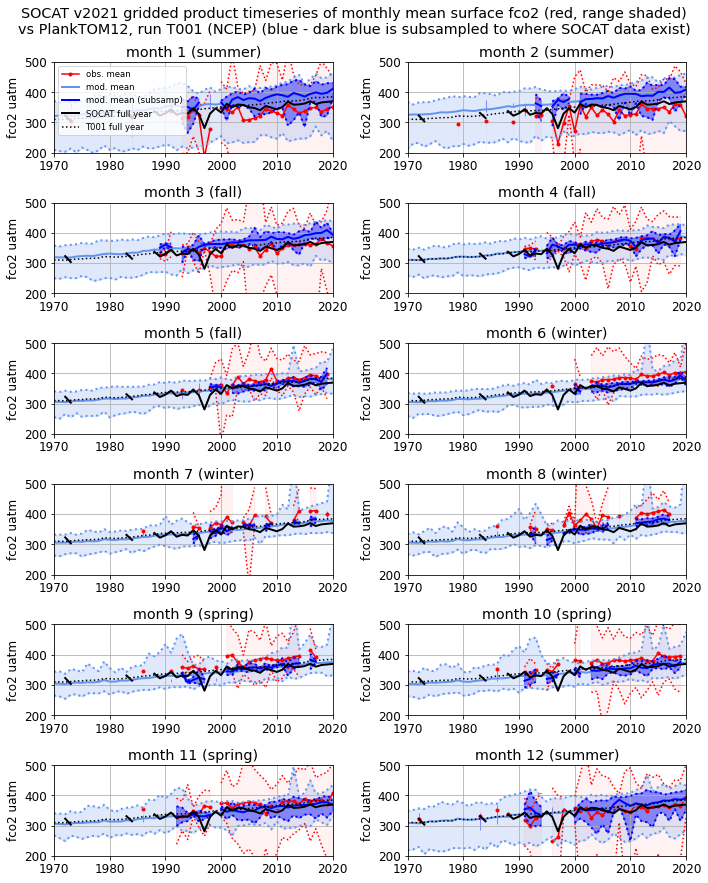

In [19]:
yrs_int = np.arange(1970,2021,1)
fact = 0.5
fig, axs = plt.subplots(6,2, figsize=(20*fact, 25*fact), \
                        facecolor='w', edgecolor='k')
axs = axs.ravel() 

T0colst = 'blue'; T0col = 'cornflowerblue'

for m in range(0,12):
    axs[m].plot(yrs_int,fco2_ts_monthly[m,2,:],'r:')
    axs[m].plot(yrs_int,fco2_ts_monthly[m,0,:],'r.-', label = 'obs. mean')
    axs[m].plot(yrs_int,fco2_ts_monthly[m,3,:],'r:')
    axs[m].fill_between(yrs_int,fco2_ts_monthly[m,2,:],\
                        fco2_ts_monthly[m,3,:],color = 'r', alpha = 0.05)

    
    axs[m].plot(yrs_int,T001_monthly[m,2,:],color = T0col, linestyle = ':',linewidth = 2)
    axs[m].plot(yrs_int,T001_monthly[m,0,:],\
                color = T0col, linestyle = '-', linewidth = 2, label = 'mod. mean')
    axs[m].plot(yrs_int,T001_monthly[m,3,:],color = T0col, linestyle = ':',linewidth = 2)
    axs[m].fill_between(yrs_int,T001_monthly[m,2,:],\
                        T001_monthly[m,3,:],color = T0col, alpha = 0.2)
    axs[m].plot(yrs_int,T001_monthly_st[m,2,:],color = T0colst, linestyle = ':',linewidth = 2)
    axs[m].plot(yrs_int,T001_monthly_st[m,0,:],color = T0colst, linestyle = '-', linewidth = 2, label = 'mod. mean (subsamp)')
    axs[m].plot(yrs_int,T001_monthly_st[m,3,:],color = T0colst, linestyle = ':',linewidth = 2)
    axs[m].fill_between(yrs_int,T001_monthly_st[m,2,:],\
                        T001_monthly_st[m,3,:],color = T0colst, alpha = 0.4)
    
tt = ['summer','summer','fall','fall','fall','winter','winter','winter',\
      'spring','spring','spring','summer']
for i in range(0,12):
    axs[i].plot(yrs_int,fco2_ts_fy[0,:],'k-', linewidth = 2, label = 'SOCAT full year')
    axs[i].plot(yrs_int,T001_fy[0,:],color ='k', linestyle = ':', label = 'T001 full year')
    axs[i].set_ylim([200,500])
    axs[i].set_xlim([1970,2020])
    axs[i].set_title(f'month {i+1} ({tt[i]})')
    axs[i].grid()
    axs[i].set_ylabel('fco2 uatm')
    axs[0].legend(loc = 'best', fontsize = 8.5, ncol = 1)
tit1 = 'SOCAT v2021 gridded product timeseries of monthly mean surface fco2 (red, range shaded)'
tit2 = 'vs PlankTOM12, run T001 (NCEP) (blue - dark blue is subsampled to where SOCAT data exist)'
#plt.suptitle(, \n SO (<-50 lat.), mean and range for a given month in red, \n (unweighted in blue, basically similar), full-year range in black')
plt.suptitle(f'{tit1}\n{tit2}')
plt.tight_layout()
             #axs.plot(yrs_dec,,'ro:')

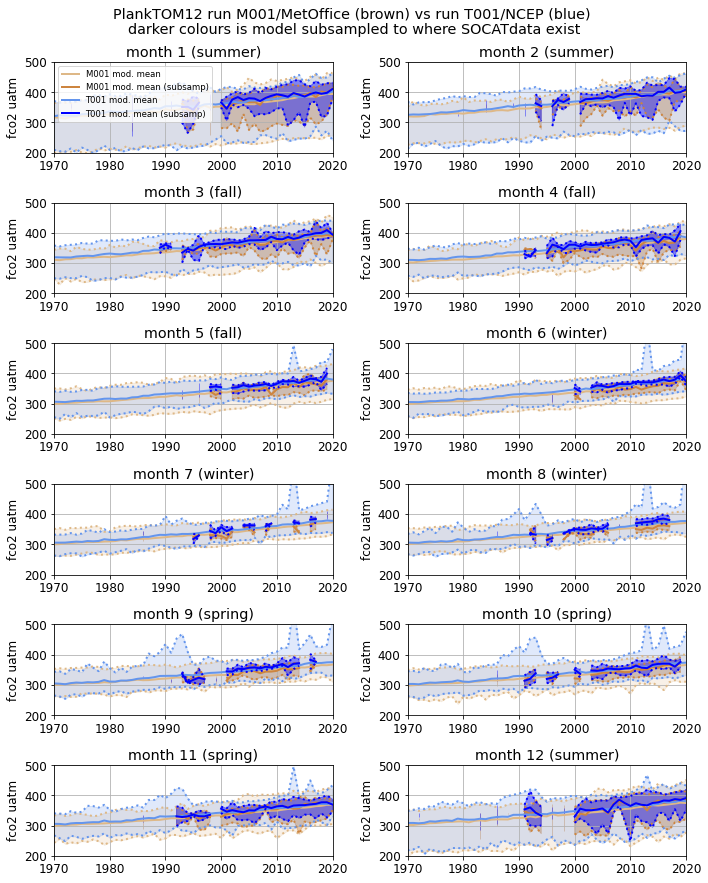

In [20]:
yrs_int = np.arange(1970,2021,1)
fact = 0.5
fig, axs = plt.subplots(6,2, figsize=(20*fact, 25*fact), \
                        facecolor='w', edgecolor='k')
axs = axs.ravel() 

T0colst = 'blue'; T0col = 'cornflowerblue'
M0colst = 'peru'; M0col = 'burlywood'
for m in range(0,12):

    axs[m].plot(yrs_int,M001_monthly[m,2,:],color = M0col, linestyle = ':',linewidth = 2)
    axs[m].plot(yrs_int,M001_monthly[m,0,:],\
                color = M0col, linestyle = '-', linewidth = 2, label = 'M001 mod. mean')
    axs[m].plot(yrs_int,M001_monthly[m,3,:],color = M0col, linestyle = ':',linewidth = 2)
    axs[m].fill_between(yrs_int,M001_monthly[m,2,:],\
                        M001_monthly[m,3,:],color = M0col, alpha = 0.2)
    axs[m].plot(yrs_int,M001_monthly_st[m,2,:],color = M0colst, linestyle = ':',linewidth = 2)
    axs[m].plot(yrs_int,M001_monthly_st[m,0,:],color = M0colst, linestyle = '-', linewidth = 2, label = 'M001 mod. mean (subsamp)')
    axs[m].plot(yrs_int,M001_monthly_st[m,3,:],color = M0colst, linestyle = ':',linewidth = 2)
    axs[m].fill_between(yrs_int,M001_monthly_st[m,2,:],\
                        M001_monthly_st[m,3,:],color = M0colst, alpha = 0.4)
    
    
    axs[m].plot(yrs_int,T001_monthly[m,2,:],color = T0col, linestyle = ':',linewidth = 2)
    axs[m].plot(yrs_int,T001_monthly[m,0,:],\
                color = T0col, linestyle = '-', linewidth = 2, label = 'T001 mod. mean')
    axs[m].plot(yrs_int,T001_monthly[m,3,:],color = T0col, linestyle = ':',linewidth = 2)
    axs[m].fill_between(yrs_int,T001_monthly[m,2,:],\
                        T001_monthly[m,3,:],color = T0col, alpha = 0.2)
    axs[m].plot(yrs_int,T001_monthly_st[m,2,:],color = T0colst, linestyle = ':',linewidth = 2)
    axs[m].plot(yrs_int,T001_monthly_st[m,0,:],color = T0colst, linestyle = '-', linewidth = 2, label = 'T001 mod. mean (subsamp)')
    axs[m].plot(yrs_int,T001_monthly_st[m,3,:],color = T0colst, linestyle = ':',linewidth = 2)
    axs[m].fill_between(yrs_int,T001_monthly_st[m,2,:],\
                        T001_monthly_st[m,3,:],color = T0colst, alpha = 0.4)
    
tt = ['summer','summer','fall','fall','fall','winter','winter','winter',\
      'spring','spring','spring','summer']
for i in range(0,12):
    axs[i].set_ylim([200,500])
    axs[i].set_xlim([1970,2020])
    axs[i].set_title(f'month {i+1} ({tt[i]})')
    axs[i].grid()
    axs[i].set_ylabel('fco2 uatm')
    axs[0].legend(loc = 'best', fontsize = 8.5, ncol = 1)
tit1 = 'PlankTOM12 run M001/MetOffice (brown) vs run T001/NCEP (blue) '
tit2 = 'darker colours is model subsampled to where SOCATdata exist'
#plt.suptitle(, \n SO (<-50 lat.), mean and range for a given month in red, \n (unweighted in blue, basically similar), full-year range in black')
plt.suptitle(f'{tit1}\n{tit2}')
plt.tight_layout()
             #axs.plot(yrs_dec,,'ro:')

In [21]:

# seasonal cycles
M001_sc = np.zeros([51,12])

for y in range(0,51):
    for m in range(1,13):
        tar = np.where((yrs_r == (1970+y)) & ((mons_r == m)))
        taryr = np.where((yrs_r == (1970+y)))
        tval = (np.nanmean(M001_fco2_so_ave_unwtd[tar,:,:])- 
              np.nanmean(M001_fco2_so_ave_unwtd[taryr,:,:]))
        M001_sc[y,m-1] = tval
        
T001_sc = np.zeros([51,12])

for y in range(0,51):
    for m in range(1,13):
        tar = np.where((yrs_r == (1970+y)) & ((mons_r == m)))
        taryr = np.where((yrs_r == (1970+y)))
        tval = (np.nanmean(T001_fco2_so_ave_unwtd[tar,:,:])- 
              np.nanmean(T001_fco2_so_ave_unwtd[taryr,:,:]))
        T001_sc[y,m-1] = tval
        
obs_sc = np.zeros([51,12])
for y in range(0,51):
    for m in range(1,13):
        tar = np.where((yrs_r == (1970+y)) & ((mons_r == m)))
        taryr = np.where((yrs_r == (1970+y)))
        tval = (np.nanmean(fco2_so_ave_weighted_f[tar,:,:])- 
              np.nanmean(fco2_so_ave_weighted_f[taryr,:,:]))
        obs_sc[y,m-1] = tval
 

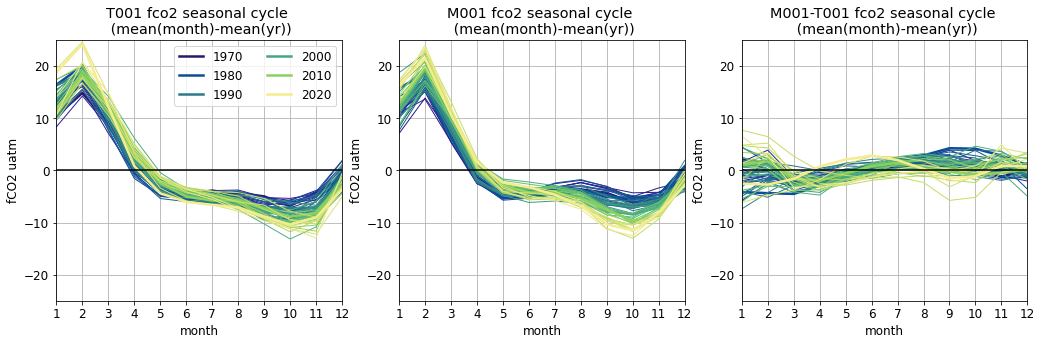

In [22]:
tcm = cm.haline; shift = 0; seg = 51; lw = 0.3
fact = 0.6
mons_p = np.arange(1,13,1)
fig, axs = plt.subplots(1,3, figsize=(29*fact, 8*fact), \
                        facecolor='w', edgecolor='k')
for y in range(0,51):
    axs[0].plot(mons_p,T001_sc[y,:],color = tcm(1.*(y+shift)/seg), linewidth = 1)
    if ((y == 0) | (y == 10) | (y == 20) | (y == 30)\
        | (y == 40) | (y == 50 )) :      
        axs[0].plot(mons_p,T001_sc[y,:],color = tcm(1.*(y+shift)/seg),\
                label = f'{1970+y}', linewidth = lw+2.2)
    axs[0].legend(loc ='best', ncol = 2)

for y in range(0,51):
    axs[1].plot(mons_p,M001_sc[y,:],color = tcm(1.*(y+shift)/seg), linewidth = 1)
    if ((y == 0) | (y == 10) | (y == 20) | (y == 30)\
        | (y == 40) | (y == 50 )) :      
        axs[1].plot(mons_p,M001_sc[y,:],color = tcm(1.*(y+shift)/seg),\
                label = f'{1970+y}', linewidth = lw+2.2)
    #axs[1].legend(loc ='best', ncol = 2)
   
for y in range(0,51):
    axs[2].plot(mons_p,M001_sc[y,:]-T001_sc[y,:],color = tcm(1.*(y+shift)/seg), linewidth = 1)
    if ((y == 0) | (y == 10) | (y == 20) | (y == 30)\
        | (y == 40) | (y == 50 )) :      
        axs[2].plot(mons_p,M001_sc[y,:]-T001_sc[y,:],color = tcm(1.*(y+shift)/seg),\
                label = f'{1970+y}', linewidth = lw+2.2)
    
tit = ['T001','M001','M001-T001']
    
for i in range(0,3):
    axs[i].set_xlim([1,12])
    axs[i].set_ylim([-25,25])
    axs[i].set_xticks(np.arange(1,13,1))
    axs[i].axhline(y=0, color = 'k')
    axs[i].grid()
    axs[i].set_ylabel('fCO2 uatm')
    axs[i].set_xlabel('month')
    axs[i].set_title(f'{tit[i]} fco2 seasonal cycle \n (mean(month)-mean(yr))')

In [23]:
import warnings
warnings.filterwarnings("ignore")

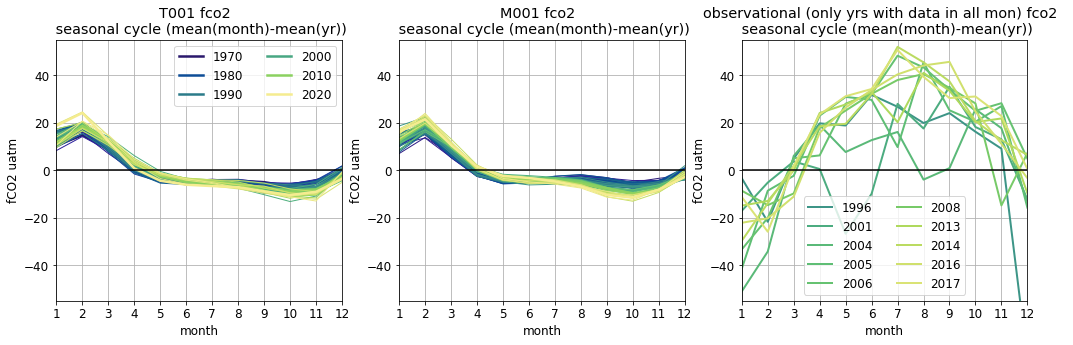

In [24]:
tcm = cm.haline; shift = 0; seg = 51; lw = 0.3
fact = 0.6
mons_p = np.arange(1,13,1)
fig, axs = plt.subplots(1,3, figsize=(29*fact, 8*fact), \
                        facecolor='w', edgecolor='k')
for y in range(0,51):
    axs[0].plot(mons_p,T001_sc[y,:],color = tcm(1.*(y+shift)/seg), linewidth = 1)
    if ((y == 0) | (y == 10) | (y == 20) | (y == 30)\
        | (y == 40) | (y == 50 )) :      
        axs[0].plot(mons_p,T001_sc[y,:],color = tcm(1.*(y+shift)/seg),\
                label = f'{1970+y}', linewidth = lw+2.2)
    axs[0].legend(loc ='best', ncol = 2)

for y in range(0,51):
    axs[1].plot(mons_p,M001_sc[y,:],color = tcm(1.*(y+shift)/seg), linewidth = 1)
    if ((y == 0) | (y == 10) | (y == 20) | (y == 30)\
        | (y == 40) | (y == 50 )) :      
        axs[1].plot(mons_p,M001_sc[y,:],color = tcm(1.*(y+shift)/seg),\
                label = f'{1970+y}', linewidth = lw+2.2)
    #axs[1].legend(loc ='best', ncol = 2)
   
for y in range(0,51):
    
    tval = obs_sc[y,:]
    if ~(np.isnan(tval).any()):
        axs[2].plot(mons_p,tval,color = tcm(1.*(y+shift)/seg), linewidth = 2, label = f'{1970+y}')
        axs[2].legend(loc ='best', ncol = 2)

tit = ['T001','M001','observational (only yrs with data in all mon)']
    
for i in range(0,3):
    axs[i].set_xlim([1,12])
    axs[i].set_ylim([-55,55])
    axs[i].set_xticks(np.arange(1,13,1))
    axs[i].axhline(y=0, color = 'k')
    axs[i].grid()
    axs[i].set_ylabel('fCO2 uatm')
    axs[i].set_xlabel('month')
    axs[i].set_title(f'{tit[i]} fco2  \n seasonal cycle (mean(month)-mean(yr))')

In [25]:
def bias_box(obs,mod):
    bias = (-np.mean(obs) + np.mean(mod))
    return bias

def RMSE_box(obs,mod):
    RMSE = (np.sqrt(np.sum((mod - obs)**2) /len(obs)))
    return RMSE

def WSS_box(obs,mod):
    xbar = np.mean(obs)
    WSS = (1-(np.sum((mod - obs)**2)  / np.sum((np.abs(mod - xbar) + np.abs(obs - xbar))**2)))
    return WSS

In [26]:
bias_M001 = np.zeros([2,51,12])
RMSE_M001 = np.zeros([51,12])
for i in range(0,51):
    for m in range(1,13):
        tar = np.where((yrs_r == (1970+i)) & ((mons_r ==m )))
        obsar = fco2_so_ave_weighted_f[tar,:,:]
        modar = M001_fco2_so_ave_unwtd_st[tar,:,:]
        obsar_t = obsar[(~np.isnan(obsar)) & (~np.isnan(modar))]
        modar_t = modar[(~np.isnan(obsar)) & (~np.isnan(modar))]
        modar_whole = M001_fco2_so_ave_unwtd[tar,:,:]
        modar_whole_t = modar_whole[~np.isnan(modar_whole)]
        bias_M001[0,i,m-1] = bias_box(obsar_t,modar_t)
        bias_M001[1,i,m-1] = bias_box(obsar_t,modar_whole_t)
        RMSE_M001[i,m-1] = RMSE_box(obsar_t,modar_t)

bias_T001 = np.zeros([2,51,12])
RMSE_T001 = np.zeros([51,12])
for i in range(0,51):
    for m in range(1,13):
        tar = np.where((yrs_r == (1970+i)) & ((mons_r ==m )))
        obsar = fco2_so_ave_weighted_f[tar,:,:]
        modar = T001_fco2_so_ave_unwtd_st[tar,:,:]
        obsar_t = obsar[(~np.isnan(obsar)) & (~np.isnan(modar))]
        modar_t = modar[(~np.isnan(obsar)) & (~np.isnan(modar))]
        modar_whole = T001_fco2_so_ave_unwtd[tar,:,:]
        modar_whole_t = modar_whole[~np.isnan(modar_whole)]
        bias_T001[0,i,m-1] = bias_box(obsar_t,modar_t)
        bias_T001[1,i,m-1] = bias_box(obsar_t,modar_whole_t)
        RMSE_T001[i,m-1] = RMSE_box(obsar_t,modar_t)

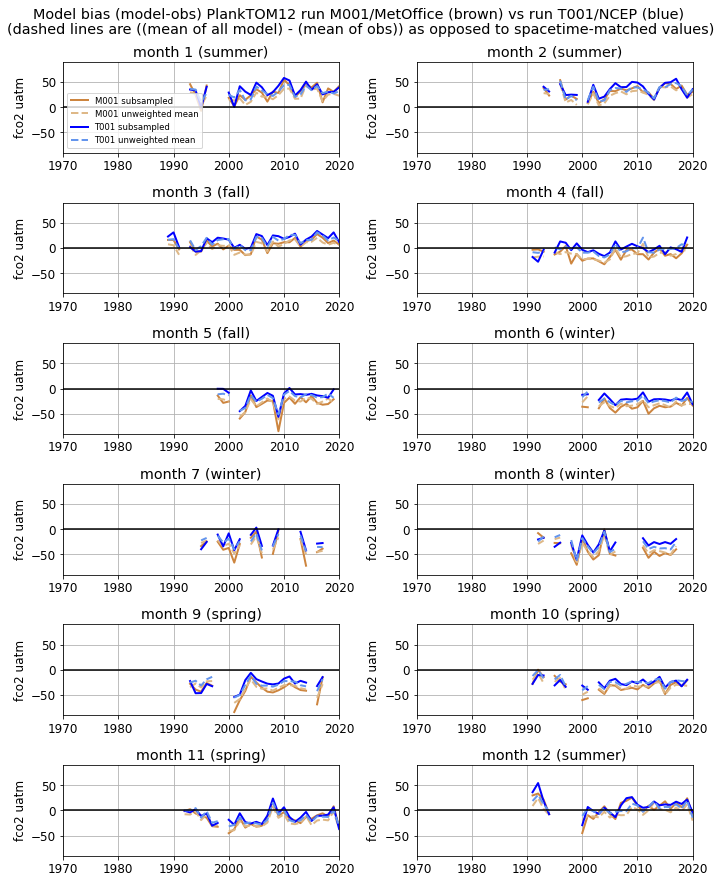

In [27]:
yrs_int = np.arange(1970,2021,1)
fact = 0.5
fig, axs = plt.subplots(6,2, figsize=(20*fact, 25*fact), \
                        facecolor='w', edgecolor='k')
axs = axs.ravel() 

T0colst = 'blue'; T0col = 'cornflowerblue'
M0colst = 'peru'; M0col = 'burlywood'
for m in range(0,12):

    axs[m].plot(yrs_int,bias_M001[0,:,m],\
                color = M0colst, linestyle = '-',linewidth = 2, label = 'M001 subsampled')
    axs[m].plot(yrs_int,bias_M001[1,:,m],\
                color = M0col, linestyle = '--',linewidth = 2, label = 'M001 unweighted mean')
    axs[m].plot(yrs_int,bias_T001[0,:,m],\
                color = T0colst, linestyle = '-',linewidth = 2, label = 'T001 subsampled')
    axs[m].plot(yrs_int,bias_T001[1,:,m],\
                color = T0col, linestyle = '--',linewidth = 2, label = 'T001 unweighted mean')
   
tt = ['summer','summer','fall','fall','fall','winter','winter','winter',\
      'spring','spring','spring','summer']
for i in range(0,12):
    axs[i].set_ylim([-90,90])
    axs[i].set_xlim([1970,2020])
    axs[i].set_title(f'month {i+1} ({tt[i]})')
    axs[i].grid()
    axs[i].set_ylabel('fco2 uatm')
    axs[i].axhline(y=0, color = 'k')
    axs[0].legend(loc = 'best', fontsize = 8.5, ncol = 1)
tit1 = 'Model bias (model-obs) PlankTOM12 run M001/MetOffice (brown) vs run T001/NCEP (blue) '
tit2 = '(dashed lines are ((mean of all model) - (mean of obs)) as opposed to spacetime-matched values)'
#plt.suptitle(, \n SO (<-50 lat.), mean and range for a given month in red, \n (unweighted in blue, basically similar), full-year range in black')
plt.suptitle(f'{tit1}\n{tit2}')
plt.tight_layout()
             #axs.plot(yrs_dec,,'ro:')

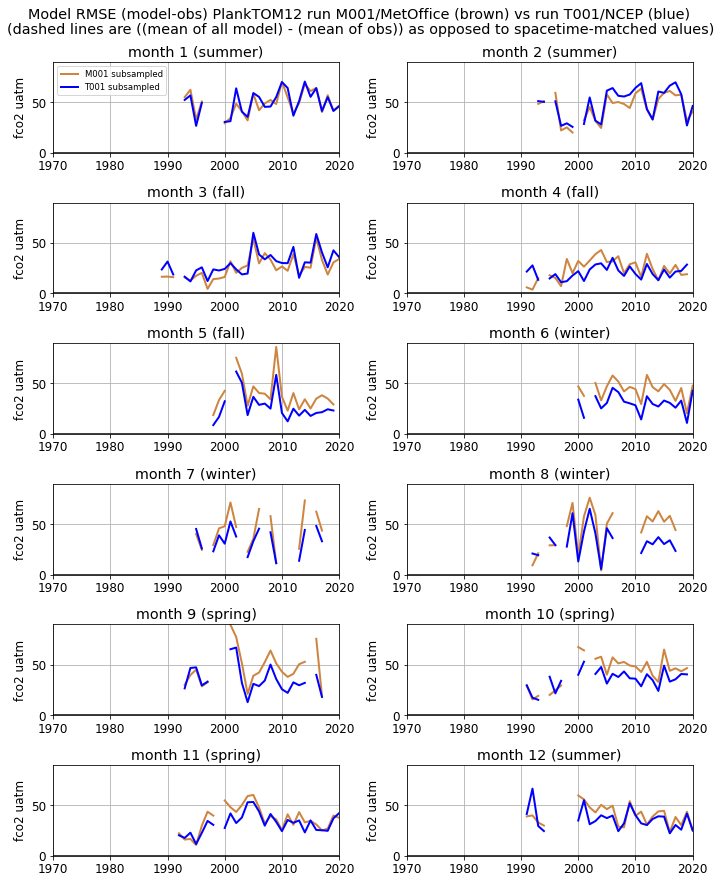

In [28]:
yrs_int = np.arange(1970,2021,1)
fact = 0.5
fig, axs = plt.subplots(6,2, figsize=(20*fact, 25*fact), \
                        facecolor='w', edgecolor='k')
axs = axs.ravel() 

T0colst = 'blue'; T0col = 'cornflowerblue'
M0colst = 'peru'; M0col = 'burlywood'
for m in range(0,12):

    axs[m].plot(yrs_int,RMSE_M001[:,m],\
                color = M0colst, linestyle = '-',linewidth = 2, label = 'M001 subsampled')
 #   axs[m].plot(yrs_int,RMSE_M001[:,m],\
  #              color = M0col, linestyle = '--',linewidth = 2, label = 'M001 unweighted mean')
    axs[m].plot(yrs_int,RMSE_T001[:,m],\
                color = T0colst, linestyle = '-',linewidth = 2, label = 'T001 subsampled')
 #   axs[m].plot(yrs_int,RMSE_T001[:,m],\
  #              color = T0col, linestyle = '--',linewidth = 2, label = 'T001 unweighted mean')
   
tt = ['summer','summer','fall','fall','fall','winter','winter','winter',\
      'spring','spring','spring','summer']
for i in range(0,12):
    axs[i].set_ylim([0,90])
    axs[i].set_xlim([1970,2020])
    axs[i].set_title(f'month {i+1} ({tt[i]})')
    axs[i].grid()
    axs[i].set_ylabel('fco2 uatm')
    axs[i].axhline(y=0, color = 'k')
    axs[0].legend(loc = 'best', fontsize = 8.5, ncol = 1)
tit1 = 'Model RMSE (model-obs) PlankTOM12 run M001/MetOffice (brown) vs run T001/NCEP (blue) '
tit2 = '(dashed lines are ((mean of all model) - (mean of obs)) as opposed to spacetime-matched values)'
#plt.suptitle(, \n SO (<-50 lat.), mean and range for a given month in red, \n (unweighted in blue, basically similar), full-year range in black')
plt.suptitle(f'{tit1}\n{tit2}')
plt.tight_layout()
             #axs.plot(yrs_dec,,'ro:')

In [29]:
print('beep boop compute complete')

beep boop compute complete
